<a href="https://colab.research.google.com/github/unslothai/notebooks/blob/main/nb/Qwen3_(4B)-GRPO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

To run this, press "*Runtime*" and press "*Run all*" on a **free** Tesla T4 Google Colab instance!
<div class="align-center">
<a href="https://unsloth.ai/"><img src="https://github.com/unslothai/unsloth/raw/main/images/unsloth%20new%20logo.png" width="115"></a>
<a href="https://discord.gg/unsloth"><img src="https://github.com/unslothai/unsloth/raw/main/images/Discord button.png" width="145"></a>
<a href="https://docs.unsloth.ai/"><img src="https://github.com/unslothai/unsloth/blob/main/images/documentation%20green%20button.png?raw=true" width="125"></a></a> Join Discord if you need help + ⭐ <i>Star us on <a href="https://github.com/unslothai/unsloth">Github</a> </i> ⭐
</div>

To install Unsloth on your own computer, follow the installation instructions on our Github page [here](https://docs.unsloth.ai/get-started/installing-+-updating).

You will learn how to do [data prep](#Data), how to [train](#Train), how to [run the model](#Inference), & [how to save it](#Save)


### News

Read our **[Qwen3 Guide](https://docs.unsloth.ai/basics/qwen3-how-to-run-and-fine-tune)** and check out our new **[Dynamic 2.0](https://docs.unsloth.ai/basics/unsloth-dynamic-2.0-ggufs)** quants which outperforms other quantization methods!

Visit our docs for all our [model uploads](https://docs.unsloth.ai/get-started/all-our-models) and [notebooks](https://docs.unsloth.ai/get-started/unsloth-notebooks).


### Installation

### Unsloth

Goal: To convert `Qwen3-4B-Base` into a reasoning model via GRPO by using OpenR1's Math dataset.

We first pre fine-tune the model to make GRPO skip trying to match formatting - this speeds GRPO up.

In [1]:
import torch
import os
import random

num_gpus = torch.cuda.device_count()
if num_gpus > 0:
    chosen_gpu = random.randint(0, num_gpus - 1)
    os.environ["CUDA_VISIBLE_DEVICES"] = str(chosen_gpu)
    print(f"Randomly selected GPU: {chosen_gpu}")
else:
    print("No GPUs available.")


Randomly selected GPU: 5


In [2]:
from unsloth import FastLanguageModel
import torch
max_seq_length = 2048 # Can increase for longer reasoning traces
lora_rank = 32 # Larger rank = smarter, but slower

model, tokenizer = FastLanguageModel.from_pretrained(
    model_name = "unsloth/Qwen3-4B-Base",
    max_seq_length = max_seq_length,
    load_in_4bit = True, # False for LoRA 16bit
    fast_inference = True, # Enable vLLM fast inference
    max_lora_rank = lora_rank,
    gpu_memory_utilization = 0.7, # Reduce if out of memory
)

model = FastLanguageModel.get_peft_model(
    model,
    r = lora_rank, # Choose any number > 0 ! Suggested 8, 16, 32, 64, 128
    target_modules = [
        "q_proj", "k_proj", "v_proj", "o_proj",
        "gate_proj", "up_proj", "down_proj",
    ],
    lora_alpha = lora_rank*2, # *2 speeds up training
    use_gradient_checkpointing = "unsloth", # Reduces memory usage
    random_state = 3407,
)

🦥 Unsloth: Will patch your computer to enable 2x faster free finetuning.
🦥 Unsloth Zoo will now patch everything to make training faster!
INFO 07-23 12:47:21 [importing.py:53] Triton module has been replaced with a placeholder.
INFO 07-23 12:47:21 [__init__.py:239] Automatically detected platform cuda.
Unsloth: Patching vLLM v1 graph capture
Unsloth: Patching vLLM v0 graph capture
==((====))==  Unsloth 2025.7.7: Fast Qwen3 patching. Transformers: 4.51.3. vLLM: 0.8.5.post1.
   \\   /|    NVIDIA GeForce RTX 4090. Num GPUs = 1. Max memory: 23.546 GB. Platform: Linux.
O^O/ \_/ \    Torch: 2.6.0+cu124. CUDA: 8.9. CUDA Toolkit: 12.4. Triton: 3.2.0
\        /    Bfloat16 = TRUE. FA [Xformers = 0.0.29.post2. FA2 = False]
 "-____-"     Free license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!
Unsloth: vLLM loading unsloth/qwen3-4b-base-unsloth-bnb-4bit with actual GPU utilization = 59.4%
Unsloth: Your GPU has CUDA com

Loading safetensors checkpoint shards:   0% Completed | 0/1 [00:00<?, ?it/s]


Loading safetensors checkpoint shards:   0% Completed | 0/1 [00:00<?, ?it/s]


INFO 07-23 12:47:33 [punica_selector.py:18] Using PunicaWrapperGPU.
INFO 07-23 12:47:33 [gpu_model_runner.py:1347] Model loading took 3.2369 GiB and 1.512122 seconds
INFO 07-23 12:47:44 [backends.py:420] Using cache directory: /mnt/data/amit/.cache/vllm/torch_compile_cache/d65c77f925/rank_0_0 for vLLM's torch.compile
INFO 07-23 12:47:44 [backends.py:430] Dynamo bytecode transform time: 10.59 s


Unsloth: Compiling kernels: 100%|██████████| 6/6 [00:00<00:00, 128.28it/s, triton_poi_fused_add_mul_sub_5]                     

INFO 07-23 12:47:58 [backends.py:136] Cache the graph of shape None for later use



Unsloth: Compiling kernels: 100%|██████████| 5/5 [00:00<00:00, 130.29it/s, triton_red_fused__to_copy_add_mean_mul_pow_rsqrt_4]

INFO 07-23 12:49:06 [backends.py:148] Compiling a graph for general shape takes 80.71 s


INFO 07-23 12:49:13 [monitor.py:33] torch.compile takes 91.30 s in total
INFO 07-23 12:49:13 [kv_cache_utils.py:634] GPU KV cache size: 42,720 tokens
INFO 07-23 12:49:13 [kv_cache_utils.py:637] Maximum concurrency for 2,048 tokens per request: 20.86x
INFO 07-23 12:49:13 [vllm_utils.py:641] Unsloth: Running patched vLLM v1 `capture_model`.
INFO 07-23 12:49:36 [gpu_model_runner.py:1686] Graph capturing finished in 22 secs, took 1.51 GiB
INFO 07-23 12:49:36 [vllm_utils.py:648] Unsloth: Patched vLLM v1 graph capture finished in 22 secs.
INFO 07-23 12:49:37 [core.py:159] init engine (profile, create kv cache, warmup model) took 123.93 seconds
Unsloth: Just some info: will skip parsing ['post_feedforward_layernorm', 'pre_feedforward_layernorm']
Unsloth: Just some info: will skip parsing ['post_feedforward_layernorm', 'pre_feedforward_layernorm']


Unsloth 2025.7.7 patched 36 layers with 36 QKV layers, 36 O layers and 36 MLP layers.


### GRPO chat template
Since we're using a base model, we should set a chat template. You can make your own chat template as well!
1. DeepSeek uses `<think>` and `</think>`, but this is **not** necessary - you can customize it however you like!
2. A `system_prompt` is recommended to at least guide the model's responses.

In [3]:
reasoning_start = "<REASONING>"
reasoning_end = "</REASONING>"
solution_start = "<CONTROLS>"
solution_end = "</CONTROLS>"

# Time settings - these can be changed by the user before generating a dataset
# For example, to aim for 50 steps in 5 seconds:
# dt = 0.1
# steps = 50
# Or for 20 steps in 10 seconds:
# dt = 0.5
# steps = 20

# Default values (can be overridden before running generation)
dt = 0.1  # Default time step duration
steps = 50 # Default number of steps


def get_system_prompt(current_dt, current_steps):
    total_time = current_dt * current_steps
    return f"""You are a control systems expert.
Given a double integrator system (ẍ = u) with initial position and velocity,
generate a sequence of {current_steps} control inputs to reach the origin (0,0) in exactly {total_time:.2f} seconds.
Position and velocity must stay within [-1, 1], and control inputs must be within [-3, 3].
Explain your approach between {reasoning_start} and {reasoning_end}.
Then provide exactly {current_steps} control values as a comma-separated list between {solution_start} and {solution_end}."""

system_prompt = get_system_prompt(dt, steps) # Initialize global system_prompt


We create a simple chat template below. Notice `add_generation_prompt` includes prepending `<start_working_out>` to guide the model to start its reasoning process.

In [4]:
chat_template = \
    "{% if messages[0]['role'] == 'system' %}"\
        "{{ messages[0]['content'] + eos_token }}"\
        "{% set loop_messages = messages[1:] %}"\
    "{% else %}"\
        "{{ '{system_prompt}' + eos_token }}"\
        "{% set loop_messages = messages %}"\
    "{% endif %}"\
    "{% for message in loop_messages %}"\
        "{% if message['role'] == 'user' %}"\
            "{{ message['content'] }}"\
        "{% elif message['role'] == 'assistant' %}"\
            "{{ message['content'] + eos_token }}"\
        "{% endif %}"\
    "{% endfor %}"\
    "{% if add_generation_prompt %}{{ '{reasoning_start}' }}"\
    "{% endif %}"

# Replace with out specific template:
chat_template = chat_template\
    .replace("'{system_prompt}'",   f"'{system_prompt}'")\
    .replace("'{reasoning_start}'", f"'{reasoning_start}'")
tokenizer.chat_template = chat_template

Let's see how our chat template behaves on an example:

In [5]:
# tokenizer.apply_chat_template([
#     {"role" : "user", "content" : "What is 1+1?"},
#     {"role" : "assistant", "content" : f"{reasoning_start}I think it's 2.{reasoning_end}{solution_start}2{solution_end}"},
#     {"role" : "user", "content" : "What is 2+2?"},
# ], tokenize = False, add_generation_prompt = True)

### Pre fine-tuning for formatting
We now use a subset of NVIDIA's [Open Math Reasoning dataset](https://huggingface.co/datasets/nvidia/OpenMathReasoning) which was filtered to only include high quality DeepSeek R1 traces.

We'll only filter ~59 or so examples to first "prime" / pre fine-tune the model to understand our custom GRPO formatting.

We have to format the dataset to follow our GRPO style formatting:

In [6]:
import numpy as np
import re # Import re for parsing in evaluate_control_sequence

def generate_simple_control_dataset(num_samples=500, target_dt=0.1, target_steps=50):
    """Generate double integrator control problems with LQR solutions for specific dt and steps."""
    data = []
    total_time_sec = target_dt * target_steps
    sample_system_prompt = get_system_prompt(target_dt, target_steps)
    
    for i in range(num_samples):
        # Random initial states within bounds
        x0 = np.random.uniform(-0.8, 0.8)
        v0 = np.random.uniform(-0.8, 0.8)
        
        # Problem statement
        problem = f"Control a double integrator system with initial state [position={x0:.2f}, velocity={v0:.2f}] to reach the origin (0,0) in {total_time_sec:.2f} seconds using {target_steps} steps. Ensure all states remain within [-1,1] and controls within [-3,3]."
        
        # Solve for optimal control sequence using LQR
        control_inputs = solve_double_integrator(x0, v0, target_dt, target_steps)
        
        # Generate reasoning text with LQR explanation
        reasoning = f"""For the double integrator system starting at position {x0:.2f} and velocity {v0:.2f}, I'll apply Linear Quadratic Regulator (LQR) control to reach the origin optimally in {total_time_sec:.2f} seconds using {target_steps} steps.

        The LQR approach provides an optimal feedback control law by minimizing a quadratic cost function that balances:
        1. The error in state (position and velocity)
        2. The control effort used

        For a double integrator with dynamics:
        - ẋ = v
        - v̇ = u

        The discrete-time state-space representation is:
        - x(k+1) = Ax(k) + Bu(k)

        Where:
        - A = [[1, Δt], [0, 1]]
        - B = [[0.5(Δt)², Δt]]
        - Δt = {target_dt:.2f} seconds

        Computing the optimal gain matrix K through the Riccati equation gives a feedback law u = -Kx.
        This produces a smooth control sequence that brings the system to the origin while respecting constraints.

        The resulting {target_steps} control inputs applied over {total_time_sec:.2f} seconds will optimally control the system to the target state."""
        # Format reasoning text        
        # Format control values
        control_str = ", ".join([f"{u:.3f}" for u in control_inputs])
        
        # Create output
        complete_output = f"{reasoning_start}{reasoning}{reasoning_end}{solution_start}{control_str}{solution_end}"
        
        # Add to dataset
        data.append({
            "prompt": [
                {"role": "system", "content": sample_system_prompt}, # Use sample-specific system prompt
                {"role": "user", "content": problem}
            ],
            "answer": control_str,
            "Messages": [
                {"role": "system", "content": sample_system_prompt}, # Use sample-specific system prompt
                {"role": "user", "content": problem},
                {"role": "assistant", "content": complete_output}
            ]
        })
    
    return data


def solve_double_integrator(x0, v0, dt, steps):
    """
    Compute LQR optimal control sequence for the double integrator.
    """
    import numpy as np
    import scipy.linalg as la
    
    # System dynamics for double integrator in discrete time
    A = np.array([[1, dt], 
                 [0, 1]])
    
    B = np.array([[0.5*dt**2], 
                 [dt]])
    
    # Cost matrices
    Q = np.diag([10.0, 10.0])  # State cost: position error more important than velocity
    R = np.array([[0.1]])   # Control cost (small to allow sufficient control)
    
    # Solve discrete time algebraic Riccati equation
    P = la.solve_discrete_are(A, B, Q, R)
    
    # Compute optimal feedback gain
    K = np.linalg.inv(R + B.T @ P @ B) @ B.T @ P @ A
    
    # Initial state
    x = np.array([[x0], [v0]])
    
    # Simulate the closed loop system and get control sequence
    controls = []
    states = [x.copy()]
    
    for i in range(steps):
        # Compute optimal control: u = -K*x
        u = -K @ x
        
        # Clamp control within bounds
        u_clamped = max(-3.0, min(3.0, float(u[0])))
        
        # Apply control to system
        x = A @ x + B * u_clamped
        
        # Clamp states if needed (though LQR should respect constraints if tuned well)
        x[0,0] = max(-1.0, min(1.0, x[0,0]))  # Position
        x[1,0] = max(-1.0, min(1.0, x[1,0]))  # Velocity
        
        # Save control and state
        controls.append(u_clamped)
        states.append(x.copy())
    
    return controls

/tmp/ipykernel_536974/868140251.py:104: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  u_clamped = max(-3.0, min(3.0, float(u[0])))


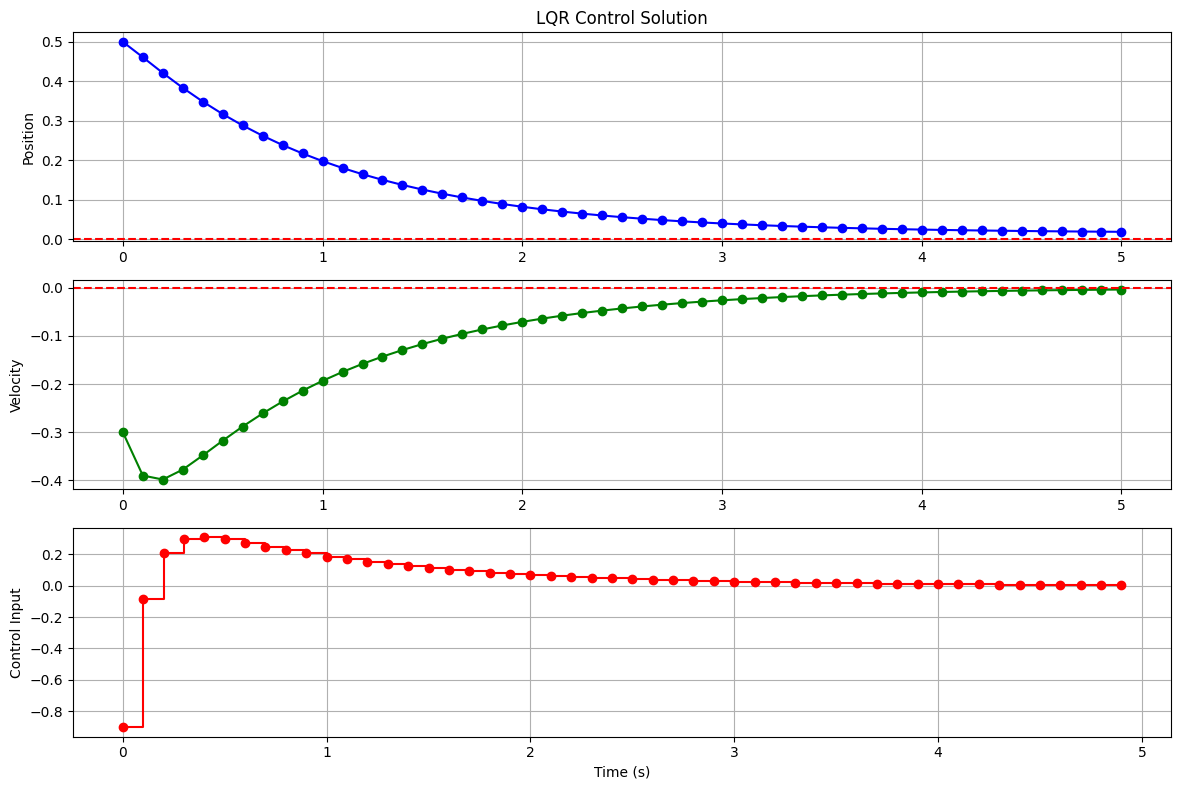

(0.018265265943625195, -0.0034555888367310142)

In [7]:
def visualize_lqr_solution(x0, v0, dt, steps):
    """Visualize an LQR solution for a specific initial state."""
    import matplotlib.pyplot as plt
    
    controls = solve_double_integrator(x0, v0, dt, steps)
    
    # Simulate trajectory
    x, v = x0, v0
    positions = [x]
    velocities = [v]
    times = [0]
    
    for i, u in enumerate(controls):
        v = v + u * dt
        x = x + v * dt
        positions.append(x)
        velocities.append(v)
        times.append((i+1) * dt)
    
    # Plot results
    plt.figure(figsize=(12, 8))
    
    plt.subplot(3, 1, 1)
    plt.plot(times, positions, 'b-o')
    plt.axhline(y=0, color='r', linestyle='--')
    plt.grid(True)
    plt.ylabel('Position')
    plt.title('LQR Control Solution')
    
    plt.subplot(3, 1, 2)
    plt.plot(times, velocities, 'g-o')
    plt.axhline(y=0, color='r', linestyle='--')
    plt.grid(True)
    plt.ylabel('Velocity')
    
    plt.subplot(3, 1, 3)
    plt.step(times[:-1], controls, 'r-o', where='post')
    plt.grid(True)
    plt.xlabel('Time (s)')
    plt.ylabel('Control Input')
    
    plt.tight_layout()
    plt.show()
    
    return positions[-1], velocities[-1]

# Test with a few initial states to verify LQR behavior
visualize_lqr_solution(0.5, -0.3, dt, steps)

In [8]:
import re

# Define regex pattern to match control sequence
solution_end_regex = r"</CONTROLS>[\s]{0,}" + \
    "(?:" + re.escape(tokenizer.eos_token) + ")?"

match_format = re.compile(
    rf"{reasoning_end}.*?"\
    rf"{solution_start}(.+?){solution_end_regex}"\
    rf"[\s]{{0,}}$",
    flags = re.MULTILINE | re.DOTALL
)

def match_format_exactly(completions, **kwargs):
    scores = []
    for completion in completions:
        score = 0
        response = completion[0]["content"]
        if match_format.search(response) is not None: score += 3.0
        scores.append(score)
    return scores

def match_format_approximately(completions, **kwargs):
    scores = []
    for completion in completions:
        score = 0
        response = completion[0]["content"]
        score += 0.5 if response.count(reasoning_end) == 1 else -1.0
        score += 0.5 if response.count(solution_start) == 1 else -1.0
        score += 0.5 if response.count(solution_end) == 1 else -1.0
        scores.append(score)
    return scores

Check to see if it worked:

Let's truncate the pre fine-tuning dataset to `max_seq_length/2` since we don't want too long reasoning traces.

Note this might take 2 minutes!

We then tokenize the messages and convert it to a Hugging Face compatible dataset format:

In [9]:
def evaluate_control_sequence(prompts, completions, answer, **kwargs):
    """Enhanced evaluation of control sequences with LQR characteristics."""
    scores = []
    
    for completion, true_answer in zip(completions, answer):
        score = 0
        response = completion[0]["content"]
        
        # Extract control sequence (keeping existing code)
        control_match = re.search(rf"{solution_start}(.*?){solution_end}", response, re.DOTALL)
        if control_match is None:
            scores.append(-2.0)  # Penalize for not following format
            continue
            
        try:
            # Parse control values
            control_text = control_match.group(1).strip()
            control_values = [float(x.strip()) for x in control_text.split(',')]
            
            # Check existing constraints
            if len(control_values) == steps:
                score += 1.0
            else:
                score -= 1.0
                
            if all(-3 <= u <= 3 for u in control_values):
                score += 1.0
            else:
                score -= 2.0
            
            # # NEW: Check for overly sparse controls (penalize many zero controls)
            # zero_count = sum(1 for u in control_values if abs(u) < 0.01)
            # if zero_count > 7:  # If more than 7 out of 10 controls are zero
            #     score -= 2.0
            
            # NEW: Check for characteristic LQR smoothness
            # LQR typically produces smooth control sequences
            if len(control_values) > 1:
                diffs = [abs(control_values[i] - control_values[i-1]) for i in range(1, len(control_values))]
                if max(diffs) < 1.5:  # Smooth control changes
                    score += 1.5
                    
            # Simulate system
            problem_text = prompts[0][-1]["content"]
            initial_match = re.search(r"position=([-\d\.]+), velocity=([-\d\.]+)", problem_text)
            if initial_match:
                x0 = float(initial_match.group(1))
                v0 = float(initial_match.group(2))
                
                # Simulate system with generated controls
                x, v = x0, v0
                valid_trajectory = True
                
                for u in control_values:
                    v = v + u * dt
                    x = x + v * dt
                    
                    if not (-1 <= x <= 1 and -1 <= v <= 1):
                        valid_trajectory = False
                        break
                
                # Reward valid trajectory
                if valid_trajectory:
                    score += 1.0
                else:
                    score -= 1.0
                
                # Reward based on final error
                final_error = np.sqrt(x**2 + v**2)
                if final_error < 0.1:
                    score += 3.0
                elif final_error < 0.2:
                    score += 2.0
                elif final_error < 0.5:
                    score += 1.0
                else:
                    score -= 1.0
            
            scores.append(score)
            
        except Exception as e:
            scores.append(-2.0)
            
    return scores

In [10]:
# Generate dataset
control_data = generate_simple_control_dataset(num_samples=500)
from datasets import Dataset
control_dataset = Dataset.from_list(control_data)

# Format dataset for training
control_dataset = control_dataset.map(
    lambda x: {"text": tokenizer.apply_chat_template(x["Messages"], tokenize=False)}
)


/tmp/ipykernel_536974/868140251.py:104: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  u_clamped = max(-3.0, min(3.0, float(u[0])))


Map:   0%|          | 0/500 [00:00<?, ? examples/s]

Let's now pre fine-tune the model so it follows our custom GRPO formatting!

/tmp/ipykernel_536974/868140251.py:104: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  u_clamped = max(-3.0, min(3.0, float(u[0])))


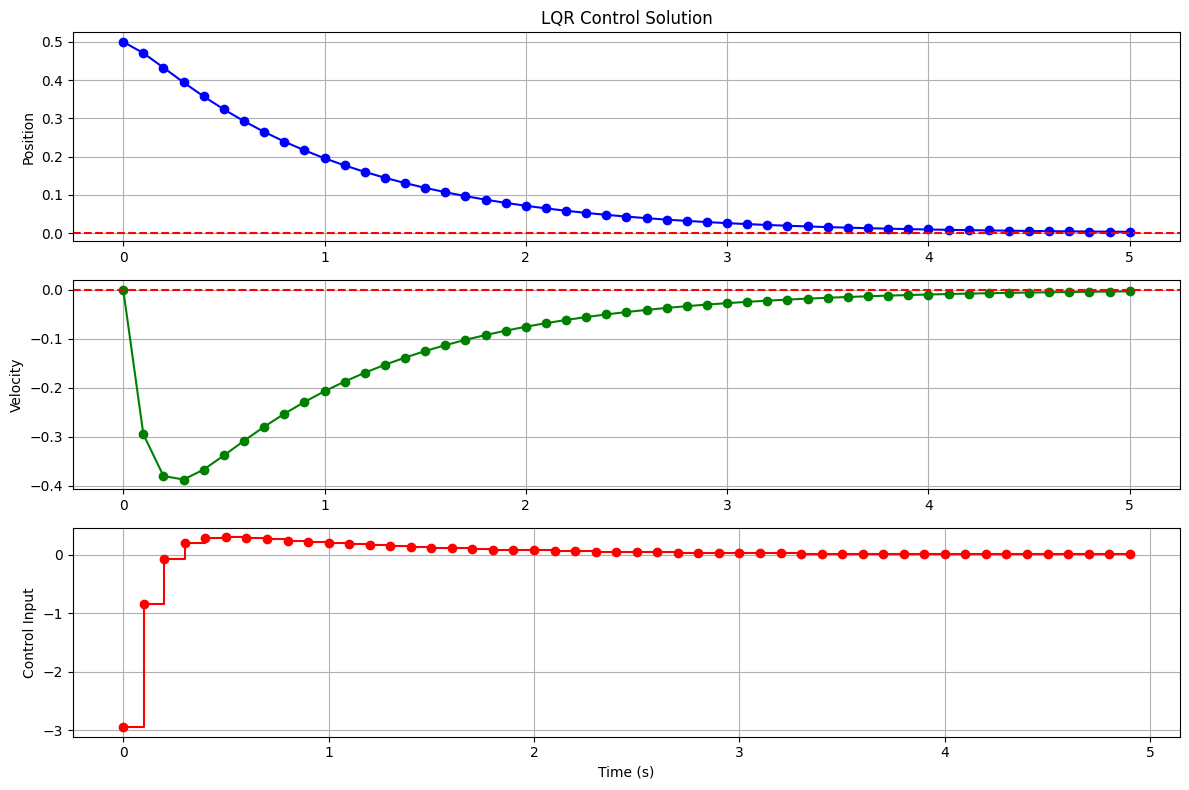

Initial: pos=0.50, vel=0.00 → Final: pos=0.0035, vel=-0.0037


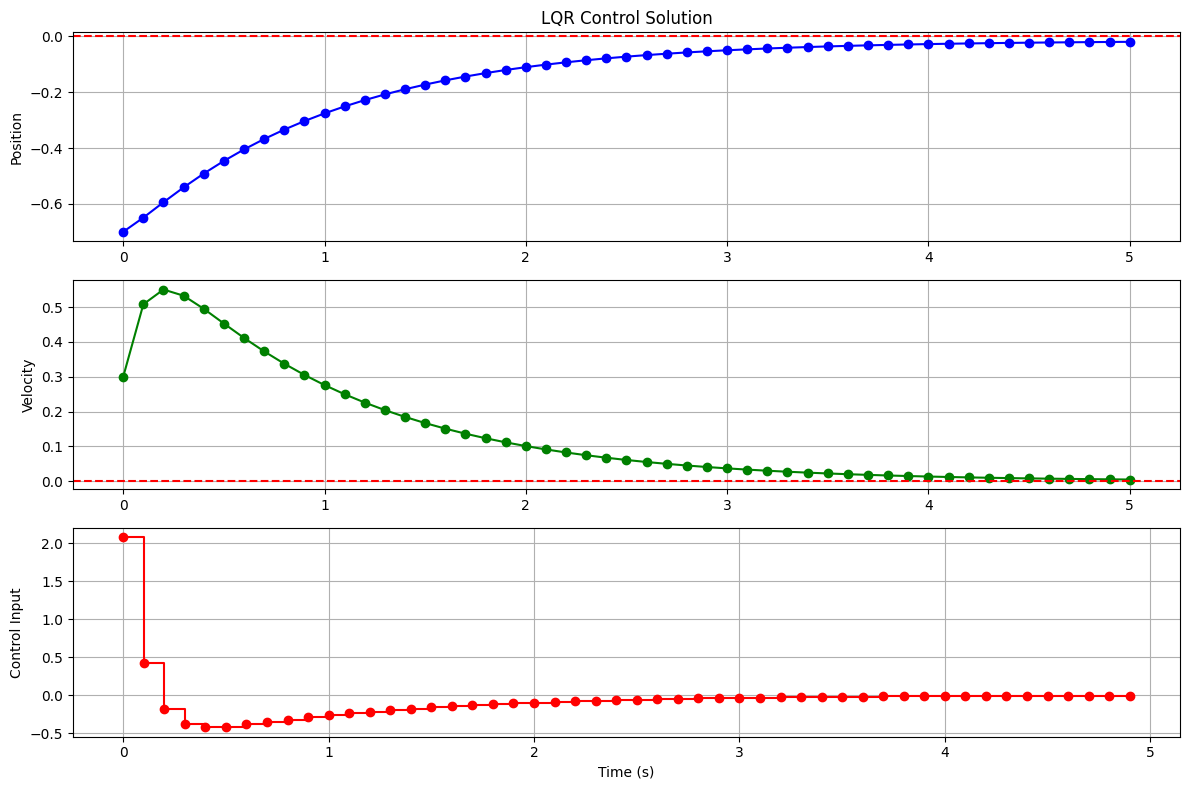

Initial: pos=-0.70, vel=0.30 → Final: pos=-0.0197, vel=0.0049


In [11]:
# Test LQR on a few examples
test_cases = [
    (0.5, 0),     # Position offset only
    # (0, 0.5),     # Velocity offset only
    # (0.5, -0.5),  # Mixed case
    (-0.7, 0.3),  # Another mixed case
]

# Generate plot for each test case
for x0, v0 in test_cases:
    final_pos, final_vel = visualize_lqr_solution(x0, v0, dt, steps)
    print(f"Initial: pos={x0:.2f}, vel={v0:.2f} → Final: pos={final_pos:.4f}, vel={final_vel:.4f}")

In [12]:
# Generate dataset
control_data = generate_simple_control_dataset(num_samples=500)
from datasets import Dataset
control_dataset = Dataset.from_list(control_data)

# Format dataset properly for SFT training
def format_for_sft(example):
    # Create a prompt without the assistant's response
    prompt = tokenizer.apply_chat_template(
        [
            {"role": "system", "content": system_prompt},
            {"role": "user", "content": example["Messages"][1]["content"]}
        ],
        tokenize=False,
        add_generation_prompt=True
    )
    
    # Get the full conversation including assistant's response
    full_text = tokenizer.apply_chat_template(
        example["Messages"],
        tokenize=False
    )
    
    return {"text": full_text}  # SFTTrainer will split this into inputs/labels

# Apply the formatting
control_dataset = control_dataset.map(format_for_sft)

# Pre fine-tune the model to learn the format
from trl import SFTTrainer, SFTConfig
trainer = SFTTrainer(
    model=model,
    tokenizer=tokenizer,
    train_dataset=control_dataset,
    args=SFTConfig(
        dataset_text_field="text",
        per_device_train_batch_size=4,  # Increased from 1
        gradient_accumulation_steps=1,
        warmup_steps=5,
        num_train_epochs=2,
        learning_rate=2e-4,
        logging_steps=5,
        optim="adamw_8bit",
        weight_decay=0.01,
        lr_scheduler_type="linear",
        seed=3407,
        report_to="wandb",
    ),
)

# Run pre-training
trainer.train()

/tmp/ipykernel_536974/868140251.py:104: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  u_clamped = max(-3.0, min(3.0, float(u[0])))


Map:   0%|          | 0/500 [00:00<?, ? examples/s]

Unsloth: Tokenizing ["text"] (num_proc=2):   0%|          | 0/500 [00:00<?, ? examples/s]

==((====))==  Unsloth - 2x faster free finetuning | Num GPUs used = 1
   \\   /|    Num examples = 500 | Num Epochs = 2 | Total steps = 250
O^O/ \_/ \    Batch size per device = 4 | Gradient accumulation steps = 1
\        /    Data Parallel GPUs = 1 | Total batch size (4 x 1 x 1) = 4
 "-____-"     Trainable parameters = 66,060,288 of 4,088,528,384 (1.62% trained)
wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Currently logged in as: jainamitnew (jainamitnew-penn-state) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Step,Training Loss
5,0.803100
10,0.273800
15,0.109200
20,0.091100
25,0.092700
30,0.087800
35,0.088500
40,0.084200
45,0.082500
50,0.080100


Unsloth: Will smartly offload gradients to save VRAM!


TrainOutput(global_step=250, training_loss=0.08576280677318573, metrics={'train_runtime': 196.1683, 'train_samples_per_second': 5.098, 'train_steps_per_second': 1.274, 'total_flos': 1.018653522432e+16, 'train_loss': 0.08576280677318573})

In [13]:
torch.cuda.empty_cache()
import gc
gc.collect()

264

In [14]:
# max_prompt_length = maximum_length + 1 # + 1 just in case!
max_completion_length = 2048

from vllm import SamplingParams
vllm_sampling_params = SamplingParams(
    min_p = 0.1,
    top_p = 1.0,
    top_k = -1,
    seed = 3407,
    stop = [tokenizer.eos_token],
    include_stop_str_in_output = True,
)

from trl import GRPOConfig, GRPOTrainer
training_args = GRPOConfig(
    vllm_sampling_params = vllm_sampling_params,
    temperature = 1.0,
    learning_rate = 5e-6,
    weight_decay = 0.01,
    warmup_ratio = 0.1,
    lr_scheduler_type = "linear",
    optim = "adamw_8bit",
    logging_steps = 1,
    per_device_train_batch_size = 1,
    gradient_accumulation_steps = 1, # Increase to 4 for smoother training
    num_generations = 4, # Decrease if out of memory
    max_completion_length = max_completion_length,
    # num_train_epochs = 1, # Set to 1 for a full training run
    max_steps = 100,
    save_steps = 500,
    report_to = "wandb", # Can use Weights & Biases
    output_dir = "outputs",

    # For optional training + evaluation
    # fp16_full_eval = True,
    # per_device_eval_batch_size = 4,
    # eval_accumulation_steps = 1,
    # eval_strategy = "steps",
    # eval_steps = 1,
)

Unsloth: We now expect `per_device_train_batch_size` to be a multiple of `num_generations`.
We will change the batch size of 1 to the `num_generations` of 4


In [ ]:
# Now run GRPO training
from trl import GRPOConfig, GRPOTrainer
trainer = GRPOTrainer(
    model=model,
    processing_class=tokenizer,
    reward_funcs=[
        match_format_exactly,
        match_format_approximately,
        evaluate_control_sequence,
    ],
    args=training_args,
    train_dataset=control_dataset,
)
trainer.train()

==((====))==  Unsloth - 2x faster free finetuning | Num GPUs used = 1
   \\   /|    Num examples = 500 | Num Epochs = 1 | Total steps = 100
O^O/ \_/ \    Batch size per device = 4 | Gradient accumulation steps = 1
\        /    Data Parallel GPUs = 1 | Total batch size (4 x 1 x 1) = 4
 "-____-"     Trainable parameters = 66,060,288 of 4,088,528,384 (1.62% trained)


Step,Training Loss,reward,reward_std,completion_length,kl,rewards / match_format_exactly,rewards / match_format_approximately,rewards / evaluate_control_sequence
1,0.000400,8.750000,1.707825,621.000000,0.362284,3.000000,1.500000,4.250000
2,0.000400,11.250000,0.957427,621.000000,0.362172,3.000000,1.500000,6.750000
3,0.000300,11.250000,0.500000,621.000000,0.335036,3.000000,1.500000,6.750000
4,0.000400,8.500000,1.632993,621.000000,0.351200,3.000000,1.500000,4.000000
5,0.000400,8.250000,2.061553,621.000000,0.364016,3.000000,1.500000,3.750000
6,0.000400,10.375000,2.625992,621.000000,0.361119,3.000000,1.500000,5.875000


<a name="Inference"></a>
### Inference
Now let's try the model we just trained! First, let's first try the model without any GRPO trained:


In [ ]:

# Test with a specific problem (similar update for inference after loading)
# For inference, you need to decide the dt and steps for the query
infer_dt_loaded = dt
infer_steps_loaded = steps
infer_total_time_loaded = infer_dt_loaded * infer_steps_loaded

# Create the system prompt for this specific inference call
current_infer_system_prompt_loaded = get_system_prompt(infer_dt_loaded, infer_steps_loaded)

test_prompt_loaded = f"Control a double integrator system with initial state [position=0.5, velocity=-0.3] to reach the origin (0,0) in {infer_total_time_loaded:.2f} seconds using {infer_steps_loaded} steps. Ensure all states remain within [-1,1] and controls within [-3,3]."


messages = [
    {"role": "system", "content": system_prompt},
    {"role": "user", "content": test_prompt_loaded},
]

text = tokenizer.apply_chat_template(
    messages,
    add_generation_prompt=True,
    tokenize=False,
)

from vllm import SamplingParams
sampling_params = SamplingParams(
    temperature=0.7,
    top_k=50,
    max_tokens=1024,
)

output = model.fast_generate(
    text,
    sampling_params=sampling_params,
    lora_request=None,
)[0].outputs[0].text

# print(messages)

print(output)

In [ ]:
system_prompt

In [ ]:
# Save the model
model.save_lora("di_control_lora")

# Test with a specific problem
test_prompt = "Control a double integrator system with initial state [position=0.5, velocity=-0.3] to reach the origin (0,0) in 5 seconds. Ensure all states remain within [-1,1] and controls within [-3,3]."

messages = [
    {"role": "system", "content": system_prompt},
    {"role": "user", "content": test_prompt},
]

text = tokenizer.apply_chat_template(
    messages,
    add_generation_prompt=True,
    tokenize=False,
)

from vllm import SamplingParams
sampling_params = SamplingParams(
    temperature=0.7,
    top_k=50,
    max_tokens=1024,
)

output = model.fast_generate(
    text,
    sampling_params=sampling_params,
    lora_request=model.load_lora("di_control_lora"),
)[0].outputs[0].text

print(output)



In [ ]:
import matplotlib.pyplot as plt

def plot_multiple_trajectories(initial_states, control_sequences, time_step=0.1): # Added time_step argument
    # dt = 0.5 # Use passed time_step
    plt.figure(figsize=(12, 12))

    for idx, (initial_state, control_values) in enumerate(zip(initial_states, control_sequences)):
        x, v = initial_state
        positions = [x]
        velocities = [v]
        times = [0]
        for i, u in enumerate(control_values):
            v = v + u * time_step # Use time_step
            x = x + v * time_step # Use time_step
            positions.append(x)
            velocities.append(v)
            times.append((i+1) * time_step) # Use time_step
        plt.subplot(3, 1, 1)
        plt.plot(times, positions, label=f'Traj {idx+1}')
        plt.subplot(3, 1, 2)
        plt.plot(times, velocities, label=f'Traj {idx+1}')
        plt.subplot(3, 1, 3)
        plt.step(times[:-1], control_values, where='post', label=f'Traj {idx+1}')

    plt.subplot(3, 1, 1)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.grid(True)
    plt.ylabel('Position')
    plt.title('Double Integrator: Multiple Trajectories')
    plt.legend()

    plt.subplot(3, 1, 2)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.grid(True)
    plt.ylabel('Velocity')
    plt.legend()

    plt.subplot(3, 1, 3)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.grid(True)
    plt.ylabel('Control Input')
    plt.xlabel('Time (s)')
    plt.legend()

    plt.tight_layout()
    plt.show()



# Example usage:
# Generate 10 random initial states and their control sequences
initial_states = []
control_sequences = []
for i in range(10):
    x0 = np.random.uniform(-0.8, 0.8)
    v0 = np.random.uniform(-0.8, 0.8)
    initial_states.append((x0, v0))
    control_sequences.append(solve_double_integrator(x0, v0, dt, steps))
    
plot_multiple_trajectories(initial_states, control_sequences, time_step=dt)
